<a href="https://colab.research.google.com/github/LOVISHARYX/HRV-and-GSR-as-Viable-Physiological-Markers-for-Mental-Health-Recognition/blob/main/Test%2C%20training%2C%20FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and Install libraries**

In [1]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.6 MB/s 
     |████████████████████████████████| 173.6 MB 9.7 kB/s 
     |████████████████████████████████| 160 kB 42.4 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=11920ee9a28f089b7340da5acb6303608ef3ffde54326073c0984b3449655c59
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:

import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix


import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


# **Importing data from drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/HRV/Stress_features/HRV+GSR_Features/selected_2level_gsr.csv')

data.head()

,Unnamed: 0,Mean RR (ms),STD RR/SDNN (ms),Mean HR (beats/min),STD HR (beats/min),Max HR (beats/min),RMSSD (ms),NNxx,pNNxx (%),Power VLF (ms2),...,Power HF (ms2),Power Total (ms2),LF/HF,Peak VLF (Hz),Peak LF (Hz),Peak HF (Hz),Fraction HF (nu),GSR_mean_h,GSR_median_h,stress_level
0,0,732.875000,71.185387,82.645765,8.044368,102.564103,105.376310,23.0,57.500000,101.197703,...,2107.756209,2813.924031,0.287021,0.035088,0.140351,0.315789,77.698815,1.162313,0.006106,0.0
1,1,726.375000,54.041940,83.073316,6.356145,97.165992,70.111518,20.0,50.000000,56.200659,...,1274.120642,2021.126371,0.542182,0.035398,0.141593,0.283186,64.843197,1.151662,0.006274,0.0
2,2,723.125000,53.279188,83.437092,6.323683,97.165992,70.014879,22.0,55.000000,34.208066,...,2165.576718,2547.519847,0.160574,0.035714,0.142857,0.357143,86.164269,1.140400,0.006743,0.0
3,3,710.357143,52.390962,84.916775,6.156541,97.165992,72.672209,20.0,47.619048,350.376474,...,557.053085,1147.167842,0.430369,0.034483,0.068966,0.344828,69.912038,1.129901,0.005528,0.0
4,4,664.034091,50.632970,90.876543,6.849407,108.597285,54.065798,15.0,34.090909,348.883116,...,1319.201401,1778.044604,0.083354,0.035398,0.070796,0.283186,92.305972,1.292639,0.324744,0.0


In [5]:
data = data.iloc[: , 1:]

In [6]:
data.head()

,Mean RR (ms),STD RR/SDNN (ms),Mean HR (beats/min),STD HR (beats/min),Max HR (beats/min),RMSSD (ms),NNxx,pNNxx (%),Power VLF (ms2),Power LF (ms2),Power HF (ms2),Power Total (ms2),LF/HF,Peak VLF (Hz),Peak LF (Hz),Peak HF (Hz),Fraction HF (nu),GSR_mean_h,GSR_median_h,stress_level
0,732.875000,71.185387,82.645765,8.044368,102.564103,105.376310,23.0,57.500000,101.197703,604.970119,2107.756209,2813.924031,0.287021,0.035088,0.140351,0.315789,77.698815,1.162313,0.006106,0.0
1,726.375000,54.041940,83.073316,6.356145,97.165992,70.111518,20.0,50.000000,56.200659,690.805070,1274.120642,2021.126371,0.542182,0.035398,0.141593,0.283186,64.843197,1.151662,0.006274,0.0
2,723.125000,53.279188,83.437092,6.323683,97.165992,70.014879,22.0,55.000000,34.208066,347.735063,2165.576718,2547.519847,0.160574,0.035714,0.142857,0.357143,86.164269,1.140400,0.006743,0.0
3,710.357143,52.390962,84.916775,6.156541,97.165992,72.672209,20.0,47.619048,350.376474,239.738283,557.053085,1147.167842,0.430369,0.034483,0.068966,0.344828,69.912038,1.129901,0.005528,0.0
4,664.034091,50.632970,90.876543,6.849407,108.597285,54.065798,15.0,34.090909,348.883116,109.960087,1319.201401,1778.044604,0.083354,0.035398,0.070796,0.283186,92.305972,1.292639,0.324744,0.0


# **Extra trees feature selection**

In [7]:
Y = data['stress_level']
X = data.drop('stress_level', axis = 1)

In [8]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100,
										criterion ='gini', max_features = 2)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)

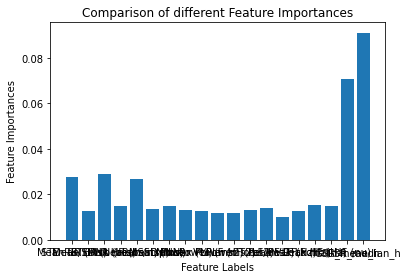

In [9]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
#data = data.iloc[: , 1:]


In [10]:
x=data.columns
#x=['Mean RR (ms)', 'STD RR/SDNN (ms)','Mean HR (beats/min)', 'STD HR (beats/min)', 'Min HR (beats/min)', 'Max HR (beats/min)','RMSSD (ms)', 'pNNxx (%)', 'Power VLF (ms2)']   
x=data[x]
y=data['stress_level']
type(x)

pandas.core.frame.DataFrame

In [11]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
641    1.0
642    1.0
643    1.0
644    1.0
645    1.0
Name: stress_level, Length: 646, dtype: float64

In [12]:
x.head()

,Mean RR (ms),STD RR/SDNN (ms),Mean HR (beats/min),STD HR (beats/min),Max HR (beats/min),RMSSD (ms),NNxx,pNNxx (%),Power VLF (ms2),Power LF (ms2),Power HF (ms2),Power Total (ms2),LF/HF,Peak VLF (Hz),Peak LF (Hz),Peak HF (Hz),Fraction HF (nu),GSR_mean_h,GSR_median_h,stress_level
0,732.875000,71.185387,82.645765,8.044368,102.564103,105.376310,23.0,57.500000,101.197703,604.970119,2107.756209,2813.924031,0.287021,0.035088,0.140351,0.315789,77.698815,1.162313,0.006106,0.0
1,726.375000,54.041940,83.073316,6.356145,97.165992,70.111518,20.0,50.000000,56.200659,690.805070,1274.120642,2021.126371,0.542182,0.035398,0.141593,0.283186,64.843197,1.151662,0.006274,0.0
2,723.125000,53.279188,83.437092,6.323683,97.165992,70.014879,22.0,55.000000,34.208066,347.735063,2165.576718,2547.519847,0.160574,0.035714,0.142857,0.357143,86.164269,1.140400,0.006743,0.0
3,710.357143,52.390962,84.916775,6.156541,97.165992,72.672209,20.0,47.619048,350.376474,239.738283,557.053085,1147.167842,0.430369,0.034483,0.068966,0.344828,69.912038,1.129901,0.005528,0.0
4,664.034091,50.632970,90.876543,6.849407,108.597285,54.065798,15.0,34.090909,348.883116,109.960087,1319.201401,1778.044604,0.083354,0.035398,0.070796,0.283186,92.305972,1.292639,0.324744,0.0


# **Testing, training and normalization**

In [13]:
test_size=0.20
seed=6
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size, random_state=seed)


In [14]:
nor_x = StandardScaler()
x_train_nor=nor_x.fit_transform(x_train)
x_test_nor=nor_x.transform(x_test)

# **Tpot**

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))
tpot.export('tpot_digits_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
1.0


In [ ]:
print(tpot.score(x_test, y_test))
tpot.export('tpot_digits_pipeline.py')

1.0


# **Data visualisation**

In [15]:
x_train.head()

,Mean RR (ms),STD RR/SDNN (ms),Mean HR (beats/min),STD HR (beats/min),Max HR (beats/min),RMSSD (ms),NNxx,pNNxx (%),Power VLF (ms2),Power LF (ms2),Power HF (ms2),Power Total (ms2),LF/HF,Peak VLF (Hz),Peak LF (Hz),Peak HF (Hz),Fraction HF (nu),GSR_mean_h,GSR_median_h
641,791.118421,70.842434,76.440531,6.704169,87.912088,50.121474,11.0,28.947368,1117.833978,503.821196,1219.226264,2840.881438,0.413230,0.034188,0.068376,0.273504,70.759877,6.478609,0.542223
185,834.785714,36.249982,72.010221,3.126706,80.267559,49.225621,11.0,31.428571,28.727183,183.612600,385.500369,597.840152,0.476297,0.035398,0.141593,0.318584,67.737056,6.926996,0.572482
298,914.062500,61.744654,65.952893,4.627417,76.923077,73.372118,14.0,43.750000,64.902561,1034.773728,1236.483285,2336.159574,0.836868,0.035398,0.106195,0.176991,54.440483,7.001206,0.451712
87,656.190476,78.089612,92.641171,10.267381,115.384615,100.748721,25.0,59.523810,268.380098,264.899979,1142.419749,1675.699826,0.231876,0.037383,0.112150,0.224299,81.176987,1.130910,0.020100
372,723.937500,89.592633,84.136110,10.281269,102.564103,121.826379,28.0,70.000000,69.367117,623.196972,1586.973096,2279.537185,0.392695,0.000000,0.071429,0.214286,71.803212,9.305135,1.154714


In [16]:
y_train.head()

641    1.0
185    1.0
298    1.0
87     0.0
372    1.0
Name: stress_level, dtype: float64

In [17]:
x_train.shape

(516, 19)

In [18]:
y_train.shape

(516,)

In [19]:
x_train_nor

array([[-0.06518106,  0.08610479, -0.12502648, ...,  0.52795068,
        -0.00662862,  0.63944446],
       [ 0.26366687, -0.78631397, -0.43970217, ...,  0.39652478,
         0.08250229,  0.72433932],
       [ 0.86068137, -0.14334045, -0.86994152, ..., -0.18158219,
         0.09725399,  0.38550897],
       ...,
       [-1.18229894, -0.02619859,  1.14692534, ..., -0.80000706,
         0.69418701,  0.59960402],
       [ 0.20461615,  0.1367714 , -0.36145206, ...,  1.06005157,
        -1.09757773, -0.87748578],
       [-1.89330925, -0.98334655,  2.23847259, ...,  0.96168579,
         1.62044741,  0.98935672]])

# **Gradient boosting**

In [ ]:
lr_list = [0.01, 0.05, 0.075, 0.1, 0.14, 0.25, 0.5, 0.75,0.85,0.80, 1]
from sklearn.metrics import roc_auc_score
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=5, max_depth=2, random_state=37)
    gb_clf.fit(x_train_nor, y_train)
    gb_clf.get_params()
    AUC=roc_auc_score(y_train, gb_clf.decision_function(x_train_nor))
    print("AUC =" +str(AUC))

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train_nor, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test_nor, y_test)))
    
    print(classification_report(y_test,gb_clf.predict(x_test_nor),zero_division=1))
    print(classification_report(y_train,gb_clf.predict(x_train_nor),zero_division=1))

AUC =0.9399308426670676
Learning rate:  0.01
Accuracy score (training): 0.860
Accuracy score (validation): 0.846
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85        72
         1.0       0.79      0.90      0.84        58

    accuracy                           0.85       130
   macro avg       0.85      0.85      0.85       130
weighted avg       0.85      0.85      0.85       130

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       251
         1.0       0.84      0.89      0.87       265

    accuracy                           0.86       516
   macro avg       0.86      0.86      0.86       516
weighted avg       0.86      0.86      0.86       516

AUC =0.9760054123130122
Learning rate:  0.05
Accuracy score (training): 0.917
Accuracy score (validation): 0.846
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        72
         1.

In [ ]:
pip install pandas_ml

In [ ]:
!pip install scikit-learn==0.21.1
!pip install pandas==0.24.2

In [ ]:
cnf_matrix=confusion_matrix(gb_clf.predict(x_test_nor), y_test)

In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
 for value in [FP,FN,TP,TN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC]:
  print(value)

[0. 0. 0.]
[0. 0. 0.]
[67. 65. 62.]
[127. 129. 132.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[1. 1. 1.]


ValueError: ignored

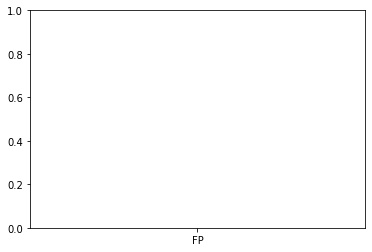

In [ ]:
plt.bar(['FP','FN','TP','TN','TPR','TNR','PPV','NPV','FPR','FNR','FDR','ACC'],[FP,FN,TP,TN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC])

# **K-fold Cross validation**

In [ ]:
x_train_nor.shape

(775, 20)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
lr_list = [0.01, 0.05, 0.075, 0.1, 0.14, 0.25, 0.5, 0.75,0.85,0.80, 1]

#for learning_rate in lr_list:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, max_features=20, max_depth=2, random_state=37)
     #print("Learning rate: ", learning_rate)
accuracy=[]     
for train_indices, test_indices in kf.split(x.to_numpy()):
  clf.fit(x.to_numpy()[train_indices], y.to_numpy()[train_indices])
  print("Accuracy:", clf.score(x.to_numpy()[test_indices], y.to_numpy()[test_indices]))
  accuracy.append(clf.score(x.to_numpy()[test_indices], y.to_numpy()[test_indices]))

print(np.mean(accuracy)

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


1.0

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
 
metrics.plot_roc_curve(gb_clf, x_test_nor, y_test)  
plt.show()

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


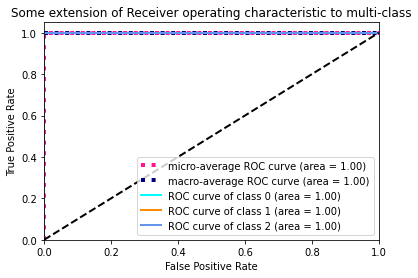

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y_train_1 = label_binarize(y_train, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])

n_classes=3

y_score = clf.fit(x_train_nor, y_train).decision_function(x_test_nor)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# **Validation curve [Knn]**

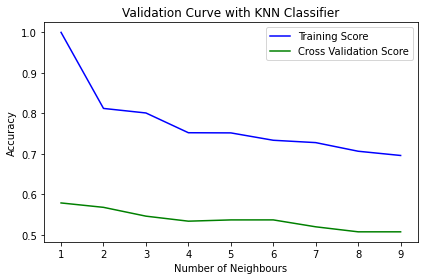

In [ ]:
# Import Required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 10, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), x, y,
									param_name = "n_neighbors",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
	label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()



# **MLP Classifier**

In [ ]:
clf = MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(32,16,16),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False).fit(x_train_nor, y_train)
y_pred=clf.predict(x_test_nor)
print(y_pred)
print(clf.score(x_test_nor, y_test))
print(clf.score(x_train_nor, y_train))
print(classification_report(y_test,y_pred,zero_division='warn'))
AUC=roc_auc_score(y_train, clf.decision_function(x_train_nor))
print("AUC =" +str(AUC))

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
0.8461538461538461
0.9418604651162791
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        72
         1.0       0.78      0.91      0.84        58

    accuracy                           0.85       130
   macro avg       0.85      0.85      0.85       130
weighted avg       0.86      0.85      0.85       130



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


AttributeError: ignored

In [ ]:
clf=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False).fit(x_train_nor, y_train)
y_pred=clf.predict(x_test_nor)
print(y_pred)
print(clf.score(x_test_nor, y_test))
print(clf.score(x_train_nor, y_train))
print(classification_report(y_test,y_pred,zero_division='warn'))



[1. 1. 0. 1. 0. 0. 0. 1. 0. 2. 1. 1. 2. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 1.
 0. 0. 0. 2. 0. 1. 2. 0. 2. 1. 1. 1. 2. 2. 0. 2. 2. 0. 2. 0. 1. 1. 2. 2.
 2. 0. 0. 0. 2. 2. 1. 2. 2. 2. 2. 1. 1. 0. 0. 1. 2. 0. 1. 2. 0. 2. 1. 2.
 1. 1. 0. 2. 1. 0. 0. 2. 2. 2. 2. 0. 2. 1. 0. 0. 0. 1. 2. 0. 1. 0. 0. 0.
 2. 2. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0.
 0. 2. 0. 1. 1. 1. 0. 1. 2. 2. 1. 1. 0. 0. 0. 2. 0. 1. 1. 1. 2. 0. 1. 0.
 2. 2. 1. 1. 2. 1. 0. 1. 0. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 1. 2. 2. 2.
 0. 0. 0. 2. 1. 1. 0. 2. 2. 2. 0. 0. 2. 1. 1. 2. 0. 0. 1. 0. 2. 0. 1. 1.
 2. 2.]
0.9948453608247423
1.0
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.98      1.00      0.99        65
         2.0       1.00      1.00      1.00        62

    accuracy                           0.99       194
   macro avg       0.99      1.00      0.99       194
weighted avg       0.99      0.99      0.99       194



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


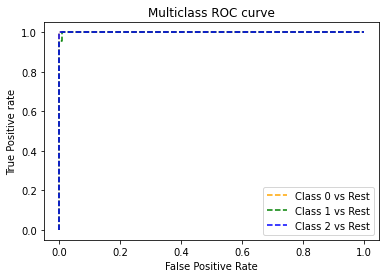

In [ ]:
from sklearn.metrics import roc_auc_score
n_classes=y.shape(1)
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#we can use a grid search to find the best parameters
k=np.random.randint(1,50,60)

#define the list of parameters for the model
parameter_space = parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(128,64,16),(256,128,32),(64,64,64,16),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#we can build gridsearch model using above parameter
random_search = RandomizedSearchCV(clf,parameter_space,n_iter=5, cv=5, n_jobs = -1, verbose=0)
random_search.fit(x_train, y_train)

print("train score:" + str(random_search.score(x_train,y_train)))
print("test score:" + str(random_search.score(x_test, y_test)))

print("best score****:")
print(random_search.best_score_)
print("best parameters:")
print(random_search.best_params_)
print("best estimator:")
print(random_search.best_estimator_)

tarin score:0.7148387096774194
test score:0.39690721649484534
best score****:
0.4193548387096774
best parameters:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (256, 128, 32), 'alpha': 0.05, 'activation': 'tanh'}
best estimator:
MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 32), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
random_search = RandomizedSearchCV(classifier,params,n_iter=5, cv=10, n_jobs = -1, verbose=0)
random_search.fit(X_train, y_train)

print("tarin score:" + str(random_search.score(X_train,y_train)))
print("test score:" + str(random_search.score(X_test, y_test)))

print("best score****:")
print(random_search.best_score_)
print("best parameters:")
print(random_search.best_params_)
print("best estimator:")
print(random_search.best_estimator_)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_cv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf_cv.fit(x, y) # X is train samples and y is the corresponding l

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

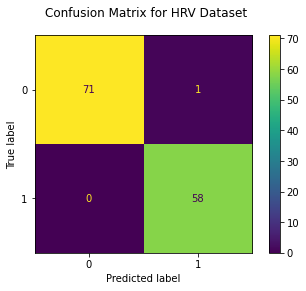

In [ ]:
fig=plot_confusion_matrix(clf, x_test_nor, y_test,display_labels=["0","1","2"])
fig.figure_.suptitle("Confusion Matrix for HRV Dataset")
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_nor, y_train)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_train_nor)

AUC=roc_auc_score(y_train, clf.predict_proba(x_train_nor), multi_class='ovr',average='weighted')
print("AUC =" + str(AUC))

AUC =0.915919045946238
